In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("data/clinicaltrial_data.csv")

In [3]:
# Read the Mouse and Drug Data and the Clinical Trial Data

In [4]:
mouse_drug_data_to_load

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [5]:
clinical_trial_data_to_load

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
#Combine the data into a single dataset
merged_df = pd.merge(mouse_drug_data_to_load, clinical_trial_data_to_load, how = 'outer', on = 'Mouse ID')

In [7]:
# Display the data table for preview
merged_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
mean_tumor_volume = mean_tumor_volume = pd.DataFrame(data = mean_tumor_volume)
mean_tumor_volume = mean_tumor_volume.reset_index()
# Preview DataFrame
mean_tumor_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_volume = merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
se_tumor_volume = pd.DataFrame(se_tumor_volume)
# Preview DataFrame
se_tumor_volume = se_tumor_volume.reset_index()
se_tumor_volume.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# Minor Data Munging to Re-Format the Data Frames
Tumor_response = pd.pivot_table(merged_df, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)

# Preview that Reformatting worked
Tumor_response.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


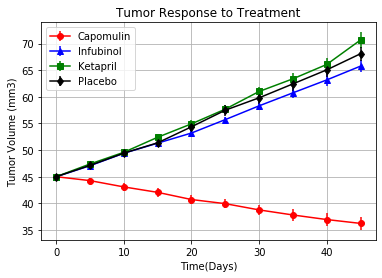

In [11]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
x_axis = Tumor_response.index.values

# Plot Capomulin
y_axis = Tumor_response.Capomulin.values
standard_errors = se_tumor_volume[se_tumor_volume.Drug == 'Capomulin']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Capomulin', color='red', linestyle='solid')

#Plot Infubinol
y_axis = Tumor_response.Infubinol.values
standard_errors = se_tumor_volume[se_tumor_volume.Drug == 'Infubinol']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt='^', label='Infubinol', color='blue', linestyle='solid' )

#Plot Ketapril
y_axis = Tumor_response.Ketapril.values
standard_errors = se_tumor_volume[se_tumor_volume.Drug == 'Ketapril']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt='s', label='Ketapril', color='green', linestyle='solid' )

#Plot Placebo
y_axis = Tumor_response.Placebo.values
standard_errors = se_tumor_volume[se_tumor_volume.Drug == 'Placebo']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt='d', label='Placebo', color='black', linestyle='solid' )

# Adds a legend and sets its location to the upper left
plt.legend(loc="upper left")

# Add Title and labels to the x and y axes
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")

# Set a grid on the plot
plt.grid()
# Save the Figure
plt.savefig("Plots/Tumor Response to Treatment.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastic_response = merged_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
mean_metastic_response = pd.DataFrame(data = mean_metastic_response)
mean_metastic_response = mean_metastic_response.reset_index()
# Preview DataFrame
mean_metastic_response.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_metastatic_sites = merged_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
se_metastatic_sites = pd.DataFrame(se_metastatic_sites)
se_metastatic_sites = se_metastatic_sites.reset_index()
# Preview DataFrame
se_metastatic_sites.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites = pd.pivot_table(merged_df, index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc = np.mean)
# Preview that Reformatting worked
metastatic_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


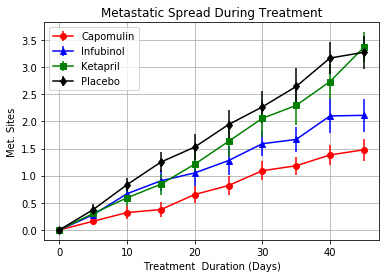

In [15]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
x_axis = metastatic_sites.index.values

#Plot Capomulin
y_axis = metastatic_sites.Capomulin.values
standard_errors = se_metastatic_sites[se_metastatic_sites.Drug == 'Capomulin']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Capomulin', color='red', linestyle='solid')

#Plot Infubinol
y_axis = metastatic_sites.Infubinol.values
standard_errors = se_metastatic_sites[se_metastatic_sites.Drug == 'Infubinol']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="^", label='Infubinol', color='blue', linestyle='solid')

#Plot Ketapril
y_axis = metastatic_sites.Ketapril.values
standard_errors = se_metastatic_sites[se_metastatic_sites.Drug == 'Ketapril']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt='s', label='Ketapril', color='green', linestyle='solid')

#Plot Placebo
y_axis = metastatic_sites.Placebo.values
standard_errors = se_metastatic_sites[se_metastatic_sites.Drug == 'Placebo']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt='d', label='Placebo', color='black', linestyle='solid')

# Adds a legend and sets its location to the upper left
plt.legend(loc="upper left")

# Add Title and labels to the x and y axes
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment  Duration (Days)")
plt.ylabel("Met. Sites")

# Set a grid on the plot
plt.grid()
# Save the Figure
plt.savefig("Plots/Metastatic Spread During Treatmen.png")
# Show the Figure
plt.show()

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Survival_Rates = merged_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()

# Convert to DataFrame

Survival_Rates = pd.DataFrame(Survival_Rates)
Survival_Rates = Survival_Rates.reset_index()
Survival_Rates = Survival_Rates.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
Survival_Rates.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
munging_survival_rates = pd.pivot_table(Survival_Rates, index='Timepoint', columns='Drug', values='Mouse Count', aggfunc = np.mean)
# Preview the Data Frame
munging_survival_rates.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [18]:
Survival_percentage = munging_survival_rates
Survival_percentage = round(Survival_percentage.apply(lambda a: a / a.max() * 100, axis=0),2)
Survival_percentage.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0


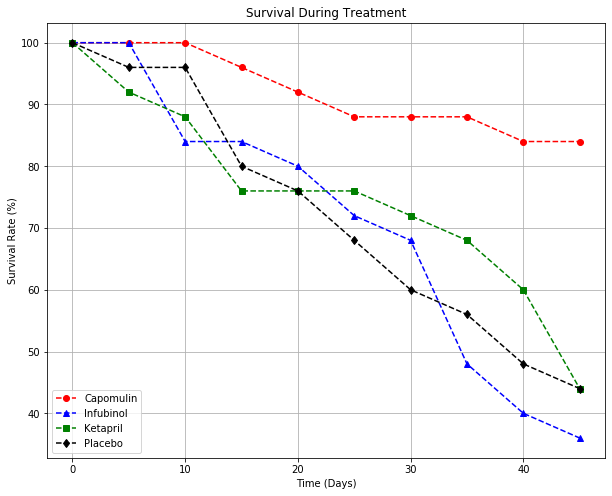

In [19]:
# Generate the Plot (Accounting for percentages)
x_axis = Survival_percentage.index.values
plt.figure(figsize=(10,8))
plt.plot(x_axis, Survival_percentage['Capomulin'], marker='o', color='r', linestyle='--', label ='Capomulin' )
plt.plot(x_axis, Survival_percentage['Infubinol'], marker='^', color='b', linestyle='--', label='Infubinol')
plt.plot(x_axis, Survival_percentage['Ketapril'], marker='s', color='g', linestyle='--', label='Ketapril')
plt.plot(x_axis, Survival_percentage['Placebo'], marker='d', color='k', linestyle='--', label='Placebo')

# Adds a legend and sets its location to the upper left
plt.legend(loc="lower left")

# Add Title and labels to the x and y axes
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.savefig("Plots/Survival During Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
Tumor_percent_change = ((Tumor_response.iloc[-1]-Tumor_response.iloc[0])/Tumor_response.iloc[0]*100).to_frame("% Change")

# Display the data to confirm
Tumor_percent_change

,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [26]:
# Store all Relevant Percent Changes into a Tuple
drugs = (Tumor_percent_change.index[0],
         Tumor_percent_change.index[2],
         Tumor_percent_change.index[3],
         Tumor_percent_change.index[5])
drugs

('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')

In [27]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (Tumor_percent_change.iloc[0,0],
                   Tumor_percent_change.iloc[2,0],
                   Tumor_percent_change.iloc[3,0],
                   Tumor_percent_change.iloc[5,0])

percent_changes

(-19.475302667894173, 46.12347172785187, 57.028794686606076, 51.29796048315153)

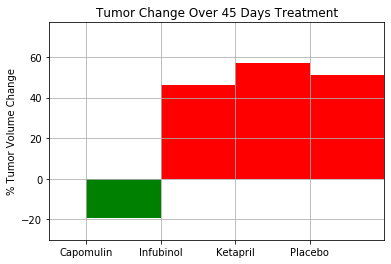

In [48]:
# Splice the data between passing and failing drugs
colors = []
for percent in percent_changes:
    if percent > 0:
        colors.append('r')
    if percent < 0:
        colors.append('g')
    
# Orient widths. Add labels, tick marks, etc.
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)


# Use functions to label the percentages of changes
plt.bar(x_axis, percent_changes, color=colors, alpha=1, align="edge", width=1)

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.5, len(drugs))
plt.ylim(-30, max(percent_changes) + 20)
plt.grid()

# Save the Figure
plt.savefig("Tumor Change Over 45 Days Treatment.png")

# Show the Figure
plt.show()